In [1]:

import glob
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.basemap import Basemap
from pathlib import Path
from typing import Optional

# sorry for the path bashing
sys.path.append('../')
import neuralpde


FIGSIZE = (10, 10)


Here, we want to choose a colormap that will nicely represent the sea ice concentration data.  In particular, we choose `Blues_r` because it is a gradient from blue to white (least to greatest,) which has a nice physical correspondence to sea ice.

In [2]:
cmap = plt.get_cmap('Blues_r')


We want to plot some data, so you'll first need to download it.  Make sure to [read this](../data.md) for some instructions on how to get the data.

In [3]:
d = neuralpde.nc.SeaIceV4(glob.glob('../data/V4/*1978*.nc'))


Now that we have the data, we're more or less following [Basemap's tutorial.](https://matplotlib.org/basemap/stable/users/plaea.html)  I chose the polar Lambert azimuthal projection because it more or less preserves area in a small region, which is nice for visualizing data that is approximately rectangularly gridded.

**Note:** The order of plotting here *does* matter.  I've chosen to draw the sea ice concentration data first then the continents and other land areas.  This results in them being drawn with nice borders, rather than weirdly rasterized by pcolormesh.

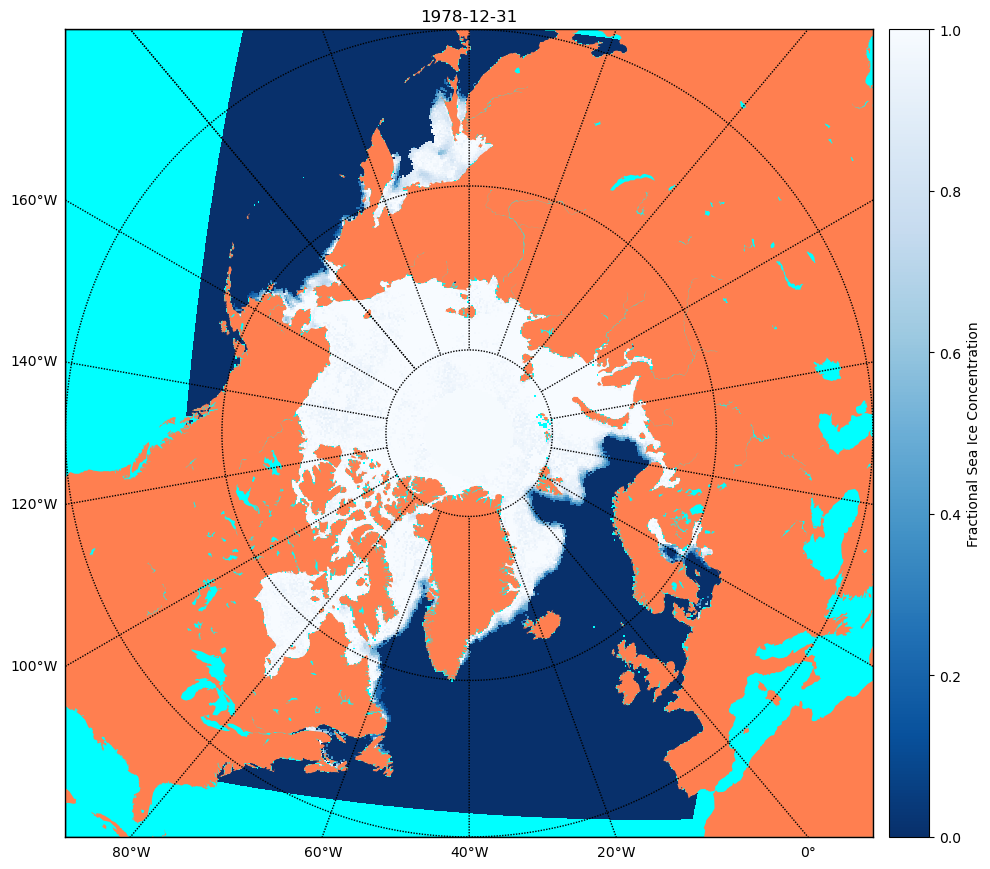

In [4]:
def plot_seaice(long, lat, data,
                cmap: Optional[matplotlib.colors.Colormap] = cmap,
                cmap_label: Optional[str] = None,
                title: Optional[str] = None,
                saveas: Optional[str] = None,
                show: Optional[bool] = False):
    plt.subplots(1, 1, figsize=FIGSIZE)
    m = Basemap(projection='nplaea', boundinglat=40, lon_0=320, resolution='l')

    m.pcolormesh(long, lat, data, cmap=cmap, latlon=True)

    m.fillcontinents(color='coral', lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    m.drawparallels([40, 60, 80])
    m.drawmeridians(np.arange(-180.,181.,20.), labels=[True, False, False, True])

    cbar = m.colorbar(cmap=cmap)
    if cmap_label:
        cbar.set_label(cmap_label)
    if title:
        plt.title(title)
    plt.tight_layout()

    if saveas:
        if not (parent := Path(saveas).parent).exists(): parent.mkdir(exist_ok=True, parents=True)
        plt.savefig(saveas)
    if show or not saveas:
        plt.show()

import warnings
warnings.filterwarnings('ignore')  # ignore warnings about non-monotonically increasing bin centers in pcolormesh

i = -1
plot_seaice(d.longitude, d.latitude, d.seaice_conc[i], cmap_label='Fractional Sea Ice Concentration', title=f'{d.date[i].strftime("%F")}')
